<a href="https://colab.research.google.com/github/RickyFirmansyah27/Web-Scrapping-Happiniess/blob/main/WebScrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup as bs4

In [14]:
def benua():
  continents_page = requests.get("https://simple.wikipedia.org/wiki/List_of_countries_by_continents").text
  continents_countries_soup = bs4(continents_page,"lxml")
  continents = continents_countries_soup.find_all('h2' > 'span', {"class":"mw-headline"})
  unwanted_words = ["Antarctica","References","Other websites"]
  target_continents = [continent.text for continent in continents if continent.text not in unwanted_words]
  target_continents


In [15]:
target_continents

['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']

In [20]:
def negara():
  ol_html = continents_countries_soup.find_all('ol')
  all_countries = [countries.find_all('li',{"class": None, "id": None}) for countries in ol_html]
  all_countries
  countries_in_continents = []
  for items in all_countries:
      countries = []
      if items:
          for country in items:
              countries = [country.find('a').text for country in items if country.find('a')]
          countries_in_continents.append(countries)
  countries_in_continents

In [32]:
def benuaDanNegara():
  countries_continent_category_df = pd.DataFrame(zip(countries_in_continents, target_continents), columns=['Country', 'Continent'])
  countries_continent_category_df
  countries_continent_category_df = countries_continent_category_df.explode('Country').reset_index(drop=True)
  countries_continent_category_df

In [33]:
countries_continent_category_df

,Country,Continent
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa
...,...,...
199,Samoa,Oceania
200,Solomon Islands,Oceania
201,Tonga,Oceania
202,Tuvalu,Oceania


In [50]:
def score():
  countries_score_page = requests.get("https://en.wikipedia.org/wiki/World_Happiness_Report#2020_report")
  countries_score_soup = bs4(countries_score_page.content,'lxml')
  countries_score_table = countries_score_soup.find('table', {'class':'wikitable'})
  countries_score_df = pd.read_html(str(countries_score_table))
  countries_score_df = countries_score_df[0]
  countries_score_df = countries_score_df.rename(columns={"Country or region":"Country"})
 
 

In [51]:
countries_score_df

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434
...,...,...,...,...,...,...,...,...,...
148,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028
149,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486
150,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081
151,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111


In [65]:
def mergeData():
  merged_df = pd.merge(countries_score_df, countries_continent_category_df, how='inner', on='Country')
  merged_df.to_csv('final_result.csv')
  merged_df

In [66]:
merged_df

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent
0,1,Finland,7.809,1.285,1.500,0.961,0.662,0.160,0.478,Europe
1,2,Denmark,7.646,1.327,1.503,0.979,0.665,0.243,0.495,Europe
2,3,Switzerland,7.560,1.391,1.472,1.041,0.629,0.269,0.408,Europe
3,4,Iceland,7.504,1.327,1.548,1.001,0.662,0.362,0.145,Europe
4,5,Norway,7.488,1.424,1.495,1.008,0.670,0.288,0.434,Europe
...,...,...,...,...,...,...,...,...,...,...
141,149,Central African Republic,3.476,0.041,0.000,0.000,0.293,0.254,0.028,Africa
142,150,Rwanda,3.312,0.343,0.523,0.572,0.604,0.236,0.486,Africa
143,151,Zimbabwe,3.299,0.426,1.048,0.375,0.377,0.151,0.081,Africa
144,152,South Sudan,2.817,0.289,0.553,0.209,0.066,0.210,0.111,Africa


Analisis Data Scapping

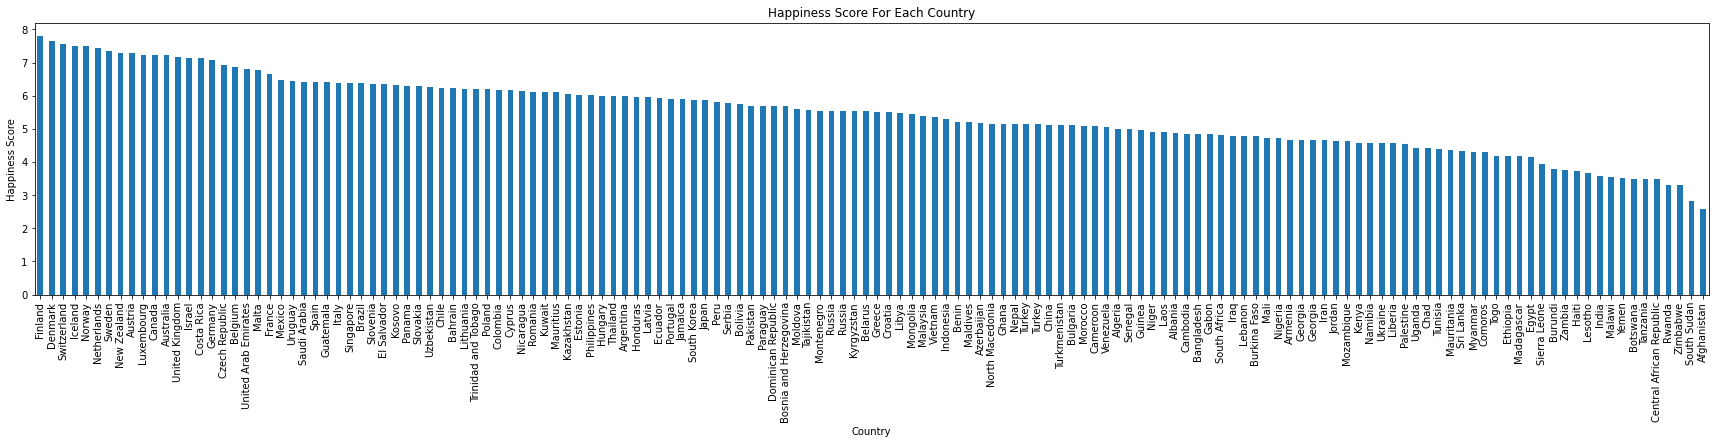

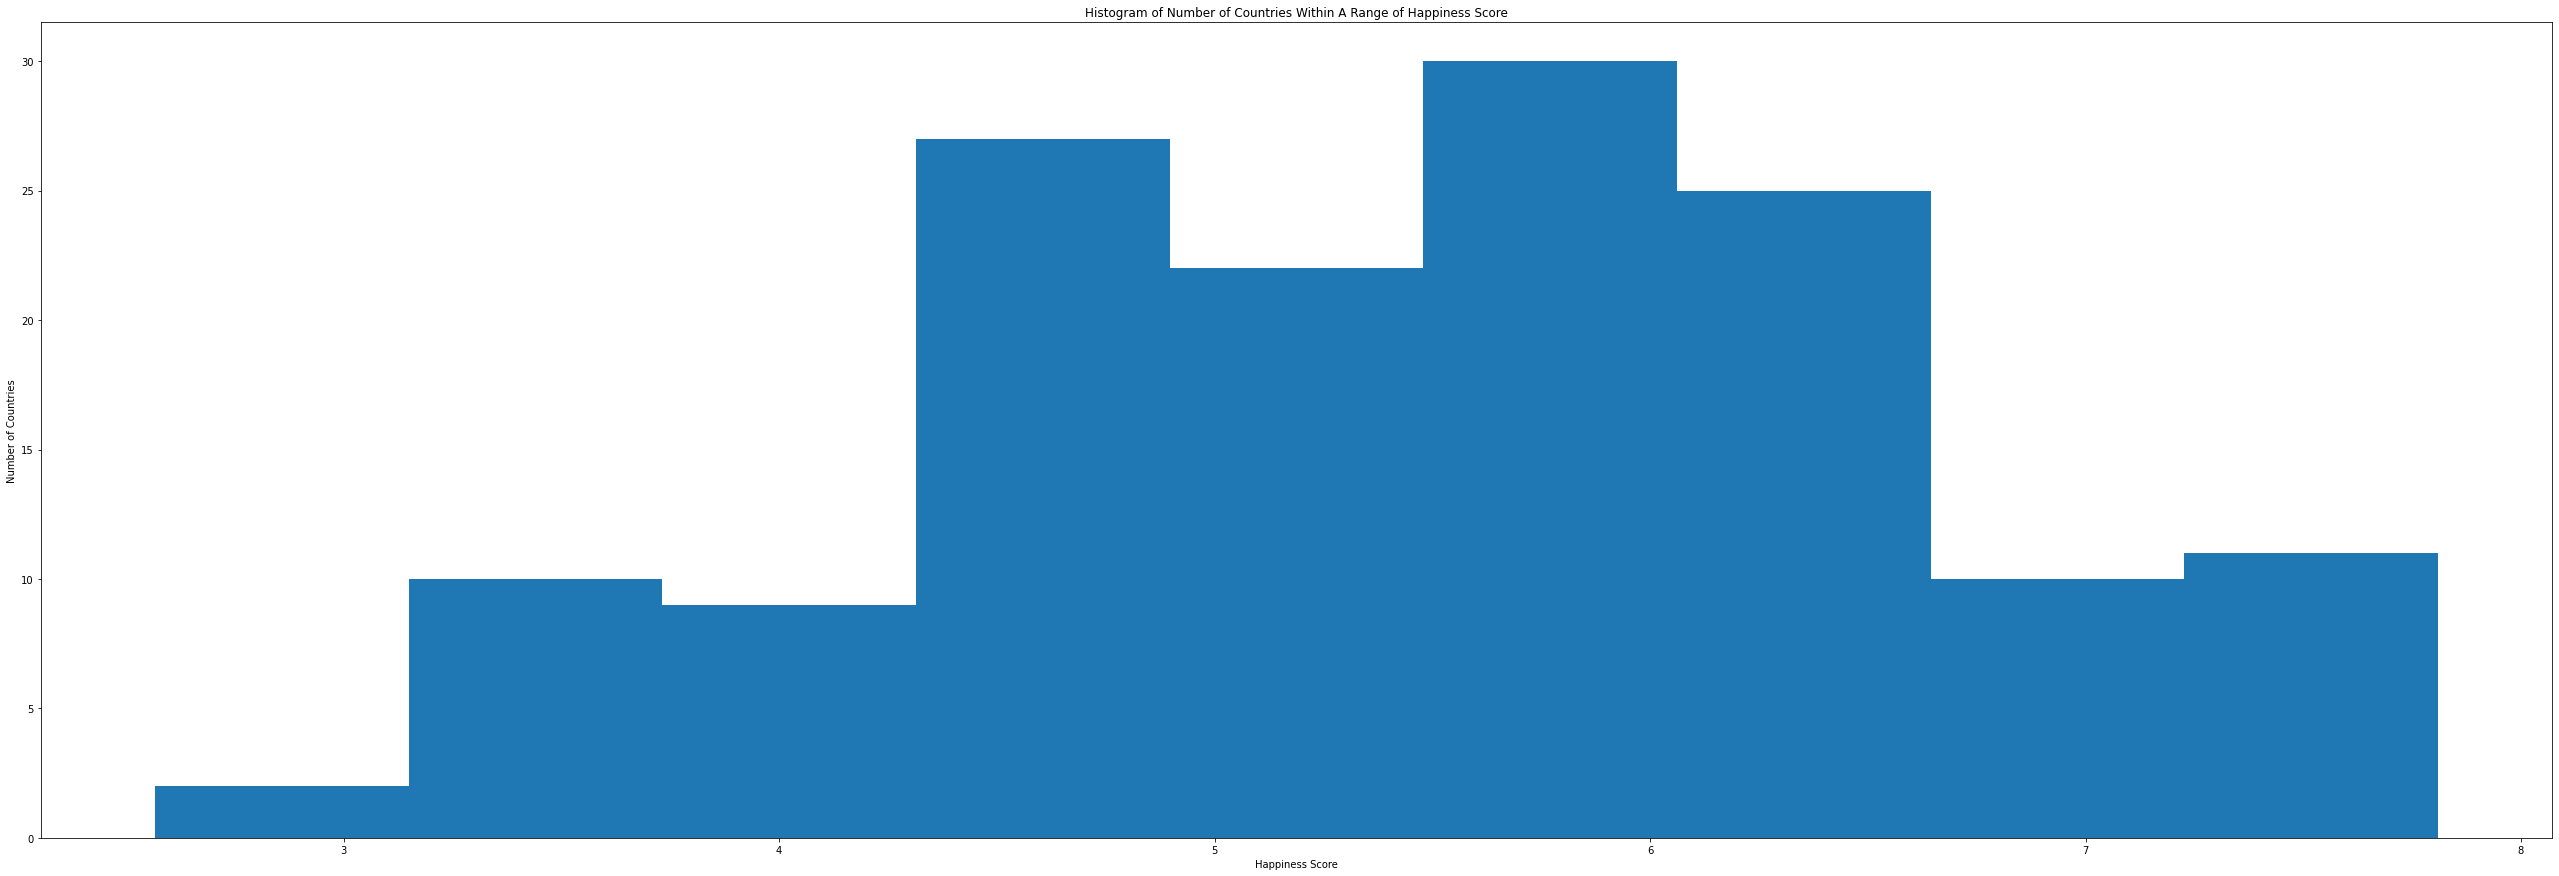

In [68]:
final_result_df_score_index = pd.read_csv('final_result.csv', index_col=2)
ax = final_result_df_score_index['Score'].plot(kind='bar', figsize=(30,5), title="Happiness Score For Each Country")
ax.set_ylabel("Happiness Score")
plt.figure(figsize=(45,15))
plt.title("Histogram of Number of Countries Within A Range of Happiness Score")
plt.xlabel("Happiness Score")
plt.ylabel("Number of Countries")
plt.hist(final_result_df_score_index['Score'], bins=9)
plt.show()

Negara-negara yang memiliki tingkat bahagia tinggi

In [69]:
median_happiness_score = merged_df['Score'].median()
countries_above_median = merged_df.loc[merged_df['Score'] > median_happiness_score]
print(countries_above_median['Country'].to_list())

['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Norway', 'Netherlands', 'Sweden', 'New Zealand', 'Austria', 'Luxembourg', 'Canada', 'Australia', 'United Kingdom', 'Israel', 'Costa Rica', 'Germany', 'Czech Republic', 'Belgium', 'United Arab Emirates', 'Malta', 'France', 'Mexico', 'Uruguay', 'Saudi Arabia', 'Spain', 'Guatemala', 'Italy', 'Singapore', 'Brazil', 'Slovenia', 'El Salvador', 'Kosovo', 'Panama', 'Slovakia', 'Uzbekistan', 'Chile', 'Bahrain', 'Lithuania', 'Trinidad and Tobago', 'Poland', 'Colombia', 'Cyprus', 'Nicaragua', 'Romania', 'Kuwait', 'Mauritius', 'Kazakhstan', 'Estonia', 'Philippines', 'Hungary', 'Thailand', 'Argentina', 'Honduras', 'Latvia', 'Ecuador', 'Portugal', 'Jamaica', 'South Korea', 'Japan', 'Peru', 'Serbia', 'Bolivia', 'Pakistan', 'Paraguay', 'Dominican Republic', 'Bosnia and Herzegovina', 'Moldova', 'Tajikistan', 'Montenegro', 'Russia', 'Russia', 'Kyrgyzstan', 'Belarus']


Faktor yang mempengaruhi(warna biru tua adalah faktor paling mempengaruhi tinggkat bahagia suatu negara)

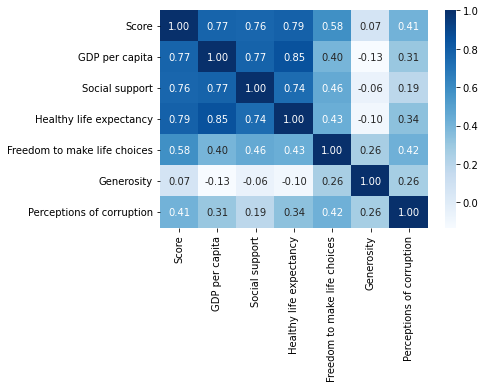

In [75]:
heatmap_df = merged_df.drop(['Overall rank','Country','Continent'], axis=1)
ax = sns.heatmap(heatmap_df.corr(), annot=True, fmt='.2f', cmap='Blues')
  

Korelasi *Data* (Ganti GDP dengan faktor lain)

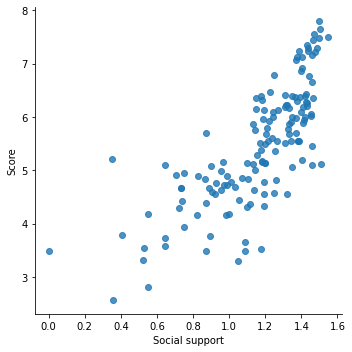

In [77]:
sns.lmplot(x='Social support', y='Score', data=merged_df, fit_reg=False)

Analisis tingkat bahagia berdasarkan benua


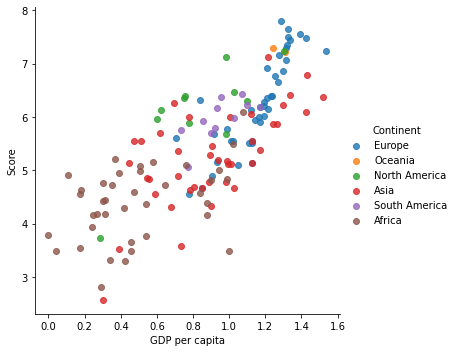

In [78]:
sns.lmplot(x='GDP per capita', y='Score', data=merged_df, fit_reg=False, hue='Continent')